In [ ]:
#############################################
# Titanic End-to-End Feature Engineering & Data Preprocessing
#############################################


In [2]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [110]:
df = pd.read_csv("/content/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [111]:
df.shape

(891, 12)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [113]:
df.columns = [col.lower() for col in df.columns]

In [114]:
#############################################
# 1. Feature Engineering (Değişken Mühendisliği)
#############################################

In [115]:
# cabin bool
df["new_cabin_bool"] = df["cabin"].notnull().astype(int)

In [116]:
# name count
df["new_name_count"] = df["name"].str.len()

In [117]:
# name word count
df["new_name_word_count"] = df["name"].apply(lambda x : len(str(x).split(" ")))

In [118]:
# name dr
df["new_name_dr"] = df["name"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))

In [119]:
# name title
df["new_name_title"] = df.name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [120]:
# family size
df["new_family_size"] = df["sibsp"] + df["parch"] + 1

In [121]:
# age pclass
df["new_age_pclass"] = df["age"] + df["pclass"]

In [122]:
# is alone
df.loc[(df["sibsp"] + df["parch"] > 0), "new_is_alone"] = "NO"
df.loc[(df["sibsp"] + df["parch"] == 0), "new_is_alone"] = "YES"

In [123]:
# age level
df.loc[(df["age"] < 18), "new_age_cat"] = "young"
df.loc[(df["age"] >= 18) & (df["age"] < 56), "new_age_cat"] = "mature"
df.loc[(df["age"] >= 56), "new_age_cat"] = "senior"

In [124]:
# sex x age
df.loc[(df["sex"] == "male") & (df["age"] <= 21), "new_sex_age"] = "YoungMale"
df.loc[(df["sex"] == "male") & (df["age"] > 21) & (df["age"] < 50), "new_sex_age"] = "matureMale"
df.loc[(df["sex"] == "male") & (df["age"] >=50), "new_sex_age"] = "seniorMale"

df.loc[(df["sex"] == "female") & (df["age"] <= 21), "new_sex_age"] = "YoungFemale"
df.loc[(df["sex"] == "female") & (df["age"] > 21) & (df["age"] < 50), "new_sex_age"] = "matureFemale"
df.loc[(df["sex"] == "female") & (df["age"] >=50), "new_sex_age"] = "seniorFemale"

In [125]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,new_cabin_bool,new_name_count,new_name_word_count,new_name_dr,new_name_title,new_family_size,new_age_pclass,new_is_alone,new_age_cat,new_sex_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0,23,4,0,Mr,2,25.000,NO,mature,matureMale
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1,51,7,0,Mrs,2,39.000,NO,mature,matureFemale
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0,22,3,0,Miss,1,29.000,YES,mature,matureFemale
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1,44,7,0,Mrs,2,36.000,NO,mature,matureFemale
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0,24,4,0,Mr,1,38.000,YES,mature,matureMale


In [126]:
df.shape

(891, 22)

In [127]:
df.isnull().sum()

,0
passengerid,0
survived,0
pclass,0
name,0
sex,0
age,177
sibsp,0
parch,0
ticket,0
fare,0


In [128]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Provides the names of categorical, numerical, and categorical-but-cardinal variables in the dataset.
    Note: Categorical variables include those that are numerically represented but still categorical.

    Parameters
    ------
        dataframe: dataframe
                The dataframe from which variable names are to be extracted
        cat_th: int, optional
                The class threshold for numerical variables that are categorical
        car_th: int, optional
                The class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                List of categorical variables
        num_cols: list
                List of numerical variables
        cat_but_car: list
                List of categorical-looking but cardinal variables

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        The sum of cat_cols + num_cols + cat_but_car equals the total number of variables
        num_but_cat is included in cat_cols.
        The sum of the 3 returned lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

"""


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [129]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 22
cat_cols: 14
num_cols: 5
cat_but_car: 3
num_but_cat: 8


In [130]:
num_cols

['passengerid', 'age', 'fare', 'new_name_count', 'new_age_pclass']

In [131]:
num_cols = [col for col in num_cols if "passengerid" not in col]

In [132]:
num_cols

['age', 'fare', 'new_name_count', 'new_age_pclass']

In [133]:
for col in num_cols:
    print(col, df[col].isnull().sum())

age 177
fare 0
new_name_count 0
new_age_pclass 177


In [61]:
#############################################
# 2. Missing Values (Eksik Değerler)
#############################################

In [134]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [51]:
missing_values_table(df)

                n_miss  ratio
cabin              687 77.100
age                177 19.870
new_age_pclass     177 19.870
embarked             2  0.220


In [135]:
df.drop("cabin", inplace=True, axis=1)

In [137]:
remove_cols = ["ticket", "name"]
df.drop(remove_cols, inplace=True, axis=1)

KeyError: "['ticket', 'name'] not found in axis"

In [138]:
df["age"] = df["age"].fillna(df.groupby("new_name_title")["age"].transform("median"))


In [142]:
df.pclass.isnull().any()

False

In [143]:
df.age.isnull().any()

False

In [144]:
df["new_age_pclass"] = df["age"] * df["pclass"]

In [145]:
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)

In [146]:
df.isnull().sum()

,0
passengerid,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
new_cabin_bool,0


In [154]:
for col in num_cols:
    print(col, df[col].isnull().sum())

age 0
fare 0
new_name_count 0
new_age_pclass 0


In [155]:
for col in num_cols:
    print(col, df[col].dtypes)

age float64
fare float64
new_name_count int64
new_age_pclass float64


In [62]:
#############################################
# 3. Outliers (Aykırı Değerler)
#############################################

In [147]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [158]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [160]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [161]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [162]:
for col in num_cols:
    print(col, check_outlier(df, col))

age False
fare False
new_name_count False
new_age_pclass False


In [ ]:
#############################################
# 4. Label Encoding
#############################################

In [165]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [163]:
binary_cols = [col for col in df.columns if df[col].dtype not in ["int", "float"] and df[col].nunique() == 2]

In [166]:
for col in binary_cols:
  df = label_encoder(df, col)

In [ ]:
#############################################
# 5. Rare Encoding
#############################################

In [167]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")


In [168]:
rare_analyser(df, "survived", cat_cols)


sex : 2
     COUNT  RATIO  TARGET_MEAN
sex                           
0      314  0.352        0.742
1      577  0.648        0.189


embarked : 3
          COUNT  RATIO  TARGET_MEAN
embarked                           
C           168  0.189        0.554
Q            77  0.086        0.390
S           646  0.725        0.339


new_name_title : 17
                COUNT  RATIO  TARGET_MEAN
new_name_title                           
Capt                1  0.001        0.000
Col                 2  0.002        0.500
Countess            1  0.001        1.000
Don                 1  0.001        0.000
Dr                  7  0.008        0.429
Jonkheer            1  0.001        0.000
Lady                1  0.001        1.000
Major               2  0.002        0.500
Master             40  0.045        0.575
Miss              182  0.204        0.698
Mlle                2  0.002        1.000
Mme                 1  0.001        1.000
Mr                517  0.580        0.157
Mrs               125

In [169]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [170]:
df = rare_encoder(df, 0.01)

In [171]:
df["new_name_title"].value_counts()

,count
new_name_title,
Mr,517
Miss,182
Mrs,125
Master,40
Rare,27


In [ ]:
#############################################
# 6. One-Hot Encoding
#############################################

In [172]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]


In [174]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [175]:
df = one_hot_encoder(df, ohe_cols)

In [176]:
df.head()

,passengerid,survived,sex,age,fare,new_cabin_bool,new_name_count,new_name_dr,new_age_pclass,new_is_alone,pclass_2,pclass_3,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_Q,embarked_S,new_name_word_count_4,new_name_word_count_5,new_name_word_count_6,new_name_word_count_7,new_name_word_count_8,new_name_word_count_9,new_name_word_count_14,new_name_title_Miss,new_name_title_Mr,new_name_title_Mrs,new_name_title_Rare,new_family_size_2,new_family_size_3,new_family_size_4,new_family_size_5,new_family_size_6,new_family_size_7,new_family_size_8,new_family_size_11,new_age_cat_nan,new_age_cat_senior,new_age_cat_young,new_sex_age_YoungMale,new_sex_age_matureFemale,new_sex_age_matureMale,new_sex_age_nan,new_sex_age_seniorFemale,new_sex_age_seniorMale
0,1,0,1,22.000,7.250,0,23,0,66.000,0,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,2,1,0,38.000,65.634,1,45,0,38.000,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,3,1,0,26.000,7.925,0,22,0,78.000,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,4,1,0,35.000,53.100,1,44,0,35.000,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,5,0,1,35.000,8.050,0,24,0,105.000,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [177]:
df.shape

(891, 54)

In [179]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 891
Variables: 54
cat_cols: 49
num_cols: 5
cat_but_car: 0
num_but_cat: 49


In [180]:
num_cols = [col for col in num_cols if "passengerid" not in col]


In [181]:
rare_analyser(df, "survived", cat_cols)


survived : 2
          COUNT  RATIO  TARGET_MEAN
survived                           
0           549  0.616        0.000
1           342  0.384        1.000


sex : 2
     COUNT  RATIO  TARGET_MEAN
sex                           
0      314  0.352        0.742
1      577  0.648        0.189


new_cabin_bool : 2
                COUNT  RATIO  TARGET_MEAN
new_cabin_bool                           
0                 687  0.771        0.300
1                 204  0.229        0.667


new_name_dr : 2
             COUNT  RATIO  TARGET_MEAN
new_name_dr                           
0              881  0.989        0.383
1               10  0.011        0.500


new_is_alone : 2
              COUNT  RATIO  TARGET_MEAN
new_is_alone                           
0               354  0.397        0.506
1               537  0.603        0.304


pclass_2 : 2
          COUNT  RATIO  TARGET_MEAN
pclass_2                           
False       707  0.793        0.361
True        184  0.207        0.473


pclass

In [182]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts() / len(df) < 0.01).any(axis=None)]

In [ ]:
# df.drop(useless_cols, axis=1, inplace=True)

In [ ]:
#############################################
# 7. Standart Scaler
#############################################

In [183]:
sclaer = StandardScaler()

In [184]:
df[num_cols] = sclaer.fit_transform(df[num_cols])

In [185]:
df[num_cols].head()

,age,fare,new_name_count,new_age_pclass
0,-0.566,-0.821,-0.437,0.071
1,0.709,2.032,2.248,-0.800
2,-0.248,-0.788,-0.559,0.444
3,0.470,1.419,2.126,-0.893
4,0.470,-0.781,-0.315,1.284


In [187]:
df.head(2)

,passengerid,survived,sex,age,fare,new_cabin_bool,new_name_count,new_name_dr,new_age_pclass,new_is_alone,pclass_2,pclass_3,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,parch_1,parch_2,parch_3,parch_4,parch_5,parch_6,embarked_Q,embarked_S,new_name_word_count_4,new_name_word_count_5,new_name_word_count_6,new_name_word_count_7,new_name_word_count_8,new_name_word_count_9,new_name_word_count_14,new_name_title_Miss,new_name_title_Mr,new_name_title_Mrs,new_name_title_Rare,new_family_size_2,new_family_size_3,new_family_size_4,new_family_size_5,new_family_size_6,new_family_size_7,new_family_size_8,new_family_size_11,new_age_cat_nan,new_age_cat_senior,new_age_cat_young,new_sex_age_YoungMale,new_sex_age_matureFemale,new_sex_age_matureMale,new_sex_age_nan,new_sex_age_seniorFemale,new_sex_age_seniorMale
0,1,0,1,-0.566,-0.821,0,-0.437,0,0.071,0,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,2,1,0,0.709,2.032,1,2.248,0,-0.800,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
#############################################
# 8. Model
#############################################

In [189]:
y = df["survived"]
X = df.drop(["passengerid", "survived"], axis=1)


In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [191]:
from sklearn.ensemble import RandomForestClassifier


In [192]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

In [193]:
y_pred = rf_model.predict(X_test)

In [194]:
accuracy_score(y_test, y_pred)

0.8022388059701493

In [195]:
# Yeni ürettiğimiz değişkenler ne alemde?
# What are the new variables we created?
#############################################

In [196]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

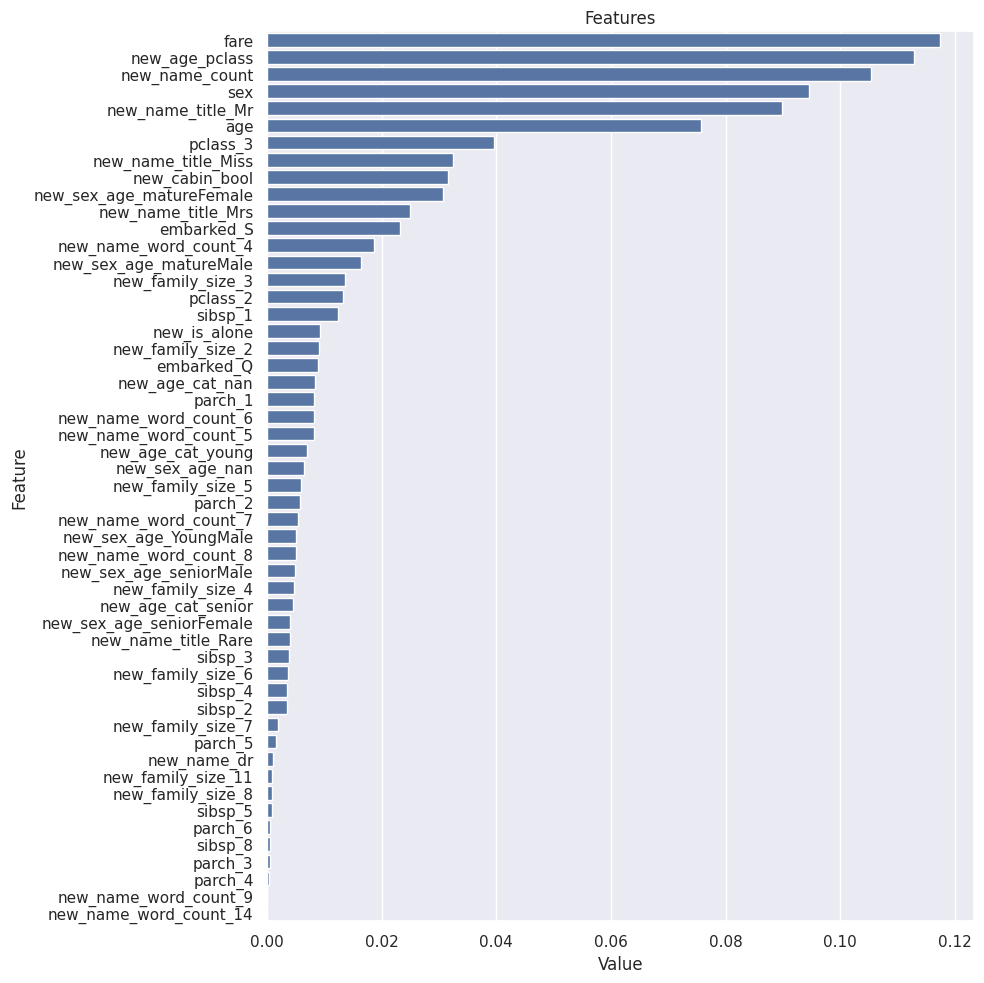

In [197]:
plot_importance(rf_model, X_train)

In [ ]:
#############################################
# Hiç bir işlem yapılmadan elde edilecek skor?
# The score without any proccessing
#############################################

In [198]:
dff = pd.read_csv("/content/titanic.csv")

In [199]:
dff.dropna(inplace=True)

In [200]:
dff = pd.get_dummies(dff, columns=["Sex", "Embarked"], drop_first=True)

In [201]:
y = dff["Survived"]
X = dff.drop(["PassengerId", "Survived", "Name", "Ticket", "Cabin"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [202]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.7090909090909091

In [203]:
# The score with the new features: 0.8022388059701493